### Importing bank account data

In [270]:
import pandas as pd 
#read_csv
df = pd.read_csv('./data/pcbanking.csv', header=None)

#give column names and drop useless columns
df.columns = ['Date', 'Amount', '-', 'Type', 'Details']
df = df.drop(columns='-')

#set date column to dateTime dtype. 
df['Date'] = pd.to_datetime(df.Date)
df

,Date,Amount,Type,Details
0,2020-12-29,-6.71,POS Purchase,OPOS Amazon Channels amazo
1,2020-11-27,-6.71,POS Purchase,OPOS Amazon Channels amazo
2,2020-11-20,1425.00,Cash Management,UBC CAD GENERAL
3,2020-09-18,-43.68,POS Purchase,OPOS Amazon.ca Prime Membamazo
4,2020-09-15,500.00,Accounts Payable,UNIVERSITY OF BRITISH COLUMBIA
...,...,...,...,...
628,2019-01-02,-1.00,POS Purchase,OPOS 50.00 GOOGLE *SERVICg.co/
629,2019-01-02,-0.00,Service Charge,MB-FREE EMAIL MONEY TRF
630,2019-01-02,-10.00,WITHDRAWAL,MB-EMAIL MONEY TRF
631,2019-01-02,-20.00,POS Purchase,COINAMATIC CANADA INC. KELOW


### Month in which most money was spent.

In [281]:
# groupby each 1 month
dg = df.groupby(pd.Grouper(key='Date', freq='1M')).sum() 


# month with most money spent. 
dg.idxmin().Amount.strftime('%B %Y')


'July 2019'

### Month in which most amount was deposited. 

In [282]:
#month with most money recieved. 
dg.idxmax().Amount.strftime('%B %Y')


'April 2019'

### Plot 

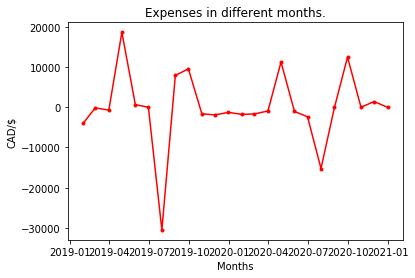

In [294]:
import matplotlib.pyplot as plt
import numpy as np 

y = dg
x = dg.index
plt.title("Expenses in different months.")
plt.plot(x,y,"r.-")
plt.ylabel("CAD/$")
plt.xlabel("Months")
plt.show()